**Linear Regression**

C:\Users\Sai kiran\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
Matplotlib is building the font cache; this may take a moment.


Mean Squared Error: 0.0
R-squared: 1.0


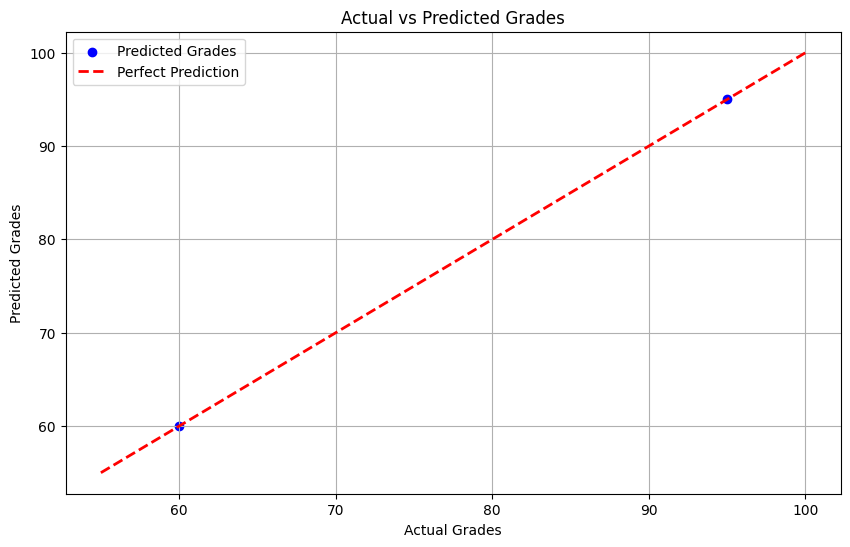

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = {
    'Study_Hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Attendance': [60, 70, 75, 80, 85, 90, 95, 100, 100, 100],
    'Grades': [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
}

df = pd.DataFrame(data)

X = df[['Study_Hours', 'Attendance']]
y = df['Grades']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted Grades')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.legend()
plt.grid()
plt.show()


**Logistic Regression**

   Hours_Studied  Exam_Score  Passed
0       3.745401   38.324483       0
1       9.507143   92.081357       1
2       7.319939   74.117002       1
3       5.986585   39.990159       0
4       1.560186   13.405145       0
Confusion Matrix:
 [[16  0]
 [ 0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



C:\Users\Sai kiran\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


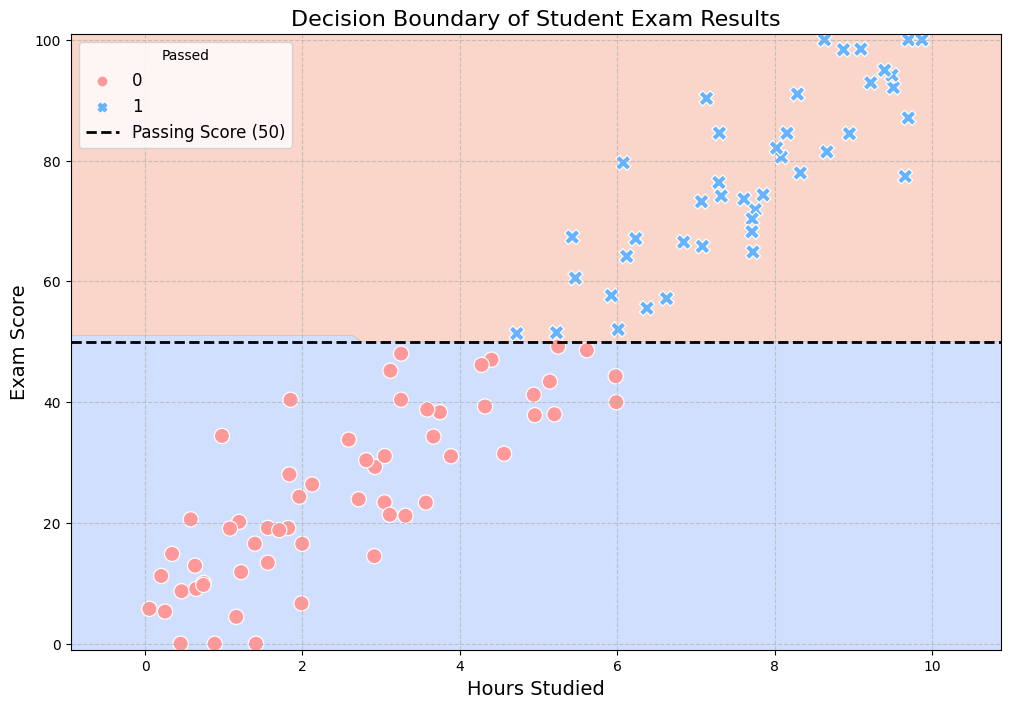

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(42)
n_samples = 100
hours_studied = np.random.uniform(0, 10, n_samples)
exam_scores = (hours_studied * 10 + np.random.normal(0, 10, n_samples)).clip(0, 100)  
passed = (exam_scores >= 50).astype(int) 
data = pd.DataFrame({
    'Hours_Studied': hours_studied,
    'Exam_Score': exam_scores,
    'Passed': passed
})

print(data.head())

X = data[['Hours_Studied', 'Exam_Score']]
y = data['Passed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(12, 8))

x_min, x_max = X['Hours_Studied'].min() - 1, X['Hours_Studied'].max() + 1
y_min, y_max = X['Exam_Score'].min() - 1, X['Exam_Score'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=np.linspace(-0.1, 1.1, 3))
sns.scatterplot(data=data, x='Hours_Studied', y='Exam_Score', hue='Passed', style='Passed', s=120, palette=['#FF9999', '#66B3FF'], markers=['o', 'X'])
plt.axhline(y=50, color='black', linestyle='--', linewidth=2, label='Passing Score (50)')
plt.title('Decision Boundary of Student Exam Results', fontsize=16)
plt.xlabel('Hours Studied', fontsize=14)
plt.ylabel('Exam Score', fontsize=14)
plt.legend(title='Passed', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


**Binary Classifier**



        Age  Blood Pressure  Disease
0  1.300227       -0.785654        1
1  1.441844       -0.560086        1
2 -0.847924       -1.366213        0
3 -0.722150       -1.411294        0
4 -1.272215        0.259451        0
Confusion Matrix:
 [[15  0]
 [ 0 15]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



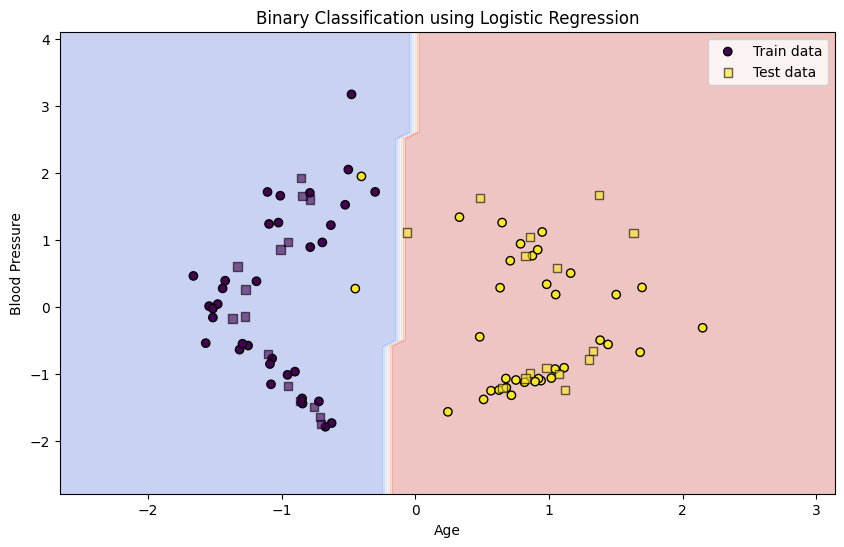

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, random_state=1)

data = pd.DataFrame(X, columns=['Age', 'Blood Pressure'])
data['Disease'] = y

print(data.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', marker='o', label='Train data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', marker='s', label='Test data', alpha=0.6)
plt.title('Binary Classification using Logistic Regression')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.legend()
plt.show()